Module 4: Clustering Analysis using K-means,
Charles Pang, PSUPR Semester 1 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("BirthDeathRates.csv")
data = df.drop(["SN","Country"],axis=1)
cols = list(data) 

In [3]:
print("Summary Statistics:\n")
sumary = data.describe(percentiles=[])
#print(data.info())
print(np.transpose(np.round(sumary)))

Summary Statistics:

            count  mean   std   min   50%    max
Literacy     25.0  73.0  22.0  24.0  78.0  100.0
Baby Mort    25.0  53.0  36.0   7.0  52.0  126.0
Birth Rate   25.0  29.0  11.0  10.0  28.0   46.0
Death Rate   25.0   9.0   4.0   2.0   9.0   19.0


No Clusters = 2  Silhouette =  0.5581364427996222
No Clusters = 3  Silhouette =  0.5140928352706384
No Clusters = 4  Silhouette =  0.47912606087760806
No Clusters = 5  Silhouette =  0.4477858787711106
No Clusters = 6  Silhouette =  0.43571402309277096
No Clusters = 7  Silhouette =  0.4065767971827372


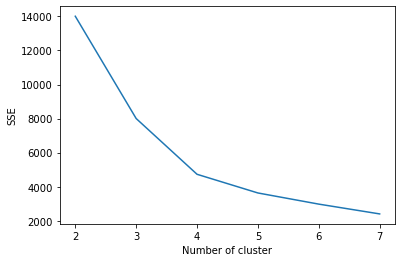

In [14]:
# Do a scree plot for various k values
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

clusters  = 8
sse = {}
for i in range(2, clusters):
    kmeans = KMeans(n_clusters=i,init="k-means++", n_init = 10, max_iter= 100)
    kmeans.fit(data) 
    
    goodness = silhouette_score(data,kmeans.predict(data))
    print("No Clusters =", i," Silhouette = ",goodness)
    
    sse[i] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [11]:
# Run the K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

clusters  = 4
kmeans = KMeans(n_clusters=clusters, init="k-means++", n_init = 10, max_iter= 100)
kmeans.fit(data) 
    
print("No Clusters =", clusters," Silhouette = ",silhouette_score(data,kmeans.predict(data)))

No Clusters = 4  Silhouette =  0.47912606087760806


In [12]:
centroids = pd.DataFrame(kmeans.cluster_centers_.T, index = cols)
print(centroids)
print()

                  0           1          2     3
Literacy    92.6250   33.666667  62.111111  87.2
Baby Mort   11.8625  115.000000  73.544444  44.2
Birth Rate  18.5000   43.666667  36.000000  24.4
Death Rate   7.2500   15.333333  10.777778   6.6



In [13]:
df['Cluster'] = kmeans.predict(data)
df.sort_values(by=['Cluster'], inplace=True)
print(df[['Cluster','Country']])

    Cluster       Country
0         0     Argentina
1         0     Australia
22        0           USA
4         0         Chile
6         0    Costa Rica
9         0        Greece
15        0        Kuwait
13        0         Italy
20        1       Somalia
8         1      Ethiopia
10        1         Haiti
18        2       Nigeria
17        2     Nicaragua
14        2         Kenya
12        2     Indonesia
11        2         India
7         2         Egypt
3         2      Cameroon
2         2       Bolivia
24        2        Zambia
16        3        Mexico
5         3         China
19        3  Phillippines
21        3      Thailand
23        3       Vietnam
